# Tugas 3 - Email

In [ ]:
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
# smtplib adalah modul bawaan Python untuk mengirim email ke mesin Internet
# Multipurpose Internet Mail Extensions (MIME) = digunakan untuk mendukung transfer satu atau beberapa lampiran teks dan
# non-teks(file grafik, audio, dan video)


SENDER = input('Enter your email address: ')
RECEIVER = input ('Send to: ')
SUBJECT = input ('Subject: ')
BODY = input ('Enter your message: ')
FILE = input ('Enter your file name: ')
PASSWORD = input ('Enter your email password: ')

EMAIL_USER = SENDER
EMAIL_RECEIVER = RECEIVER

msg = MIMEMultipart()
msg['From'] = SENDER
msg['To'] = RECEIVER
msg['Subject'] = SUBJECT
 
body = BODY
msg.attach(MIMEText(body, 'plain')) 
# msg.attach untuk attach/menempelkan body/lainnya ke pesan email
# MIMEText agar dapat disalin ke dalam objek
# plain => isi email berupa text, bukan html dll,

attachment = open (FILE, 'rb')
# mode "rb" digunakan agar dapat membuka file dalam format biner untuk dibaca 

part = MIMEBase('application','octet-stream')
part.set_payload((attachment).read())
encoders.encode_base64(part)
part.add_header('Content-Disposition',"attachment; filename= "+FILE)
# agar dapat mengupload dan mengirimkan attachment 
# Objek Message terdiri dari header dan payload. 
# Payload adalah string dalam kasus objek pesan sederhana atau daftar objek pesan untuk dokumen kontainer MIME
# (misalnya multipart/* dan pesan/rfc822).
# Saat membuat objek pesan dari awal, payload perlu dikodekan untuk diangkut melalui server email yang sesuai
# Berlaku untuk pesan  yang berisi data biner spt. gambar & teks

msg.attach(part) # attach dokumen ke dalam email 
text=msg.as_string()  #attach pesan ke dalam email, isi pesan diubah tipenya menjadi bentuk string


conn=smtplib.SMTP('smtp.gmail.com',587) 
#nama server domain untuk gmail

conn.ehlo() 
# Perintah EHLO digunakan untuk mengidentifikasi nama domain dari host pengirim ke SMTP  
# Aturan: Kirim perintah EHLO sekali sebelum perintah MAIL FROM. 
# Persyaratan: Ketika perintah STARTTLS digunakan, perintah EHLO juga harus digunakan.

conn.starttls() 
#starttls merupakan peningkatan keamanan saluran agar pengiriman pesan menjadi lebih aman

conn.login(SENDER, PASSWORD)
conn.sendmail(SENDER, RECEIVER, text)
conn.quit()


### Referensi tugas
### https://www.youtube.com/watch?v=bXRYJEKjqIM
### https://www.youtube.com/watch?v=K7ng0dN2GKo

In [7]:
from IPython.display import Image

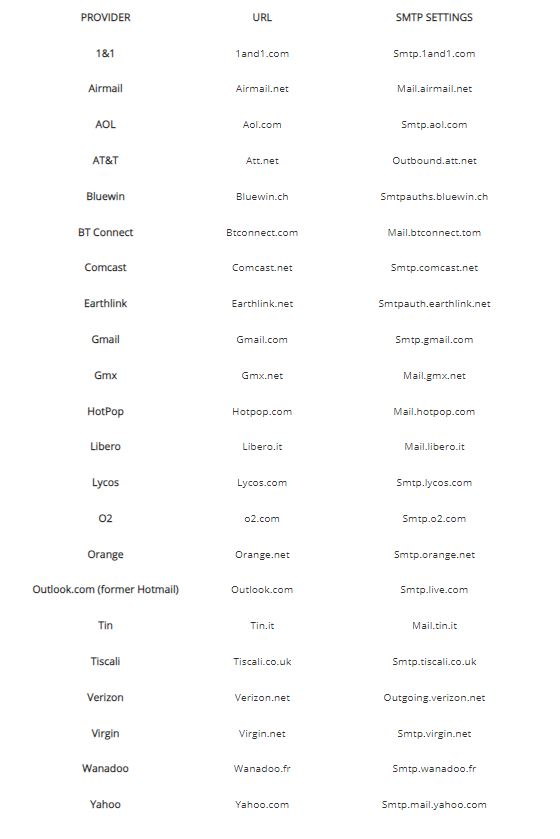

In [8]:
Image ('smtp server domain name.JPG')

##### Sumber gambar domain server
##### https://serversmtp.com/what-is-my-smtp/